# Statistical Foundations of Mahicne Learning
## 3rd_Assignment -- Moamin Abdulkareem
## Analyzing breast cancer dataset


### Imports

In [15]:
import numpy as np
from csv import reader
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import  mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Loading the dataset using csv_reader

In [75]:

# loading the dataset
# I will use csv reader to load the dataset
def load_csv(filename):
    dataset = list()
    f = open(filename,'r')
    
    csv_reader = reader(f)
    
    for row in csv_reader:
        if not row:
            continue
        dataset.append(row)
        
    return dataset


In [76]:
file = 'Features_MC.csv'
dataset = load_csv(file)
data_array = np.asarray(dataset)


### Removing ID attributes from the dataset

In [77]:
def delete_irrelevant_features(x):

    # here we delete the attributes of ids which we have to remove before any computation
    # and also the first row which is the names of the attributes is also going to be removed

    x = np.delete(x, 0, axis=1)  # first column which is ID
    x = np.delete(x, 1, axis=1)  # third column which is sampleID
    x = np.delete(x, 1, axis=1)  #forth column which is microID
    features = x[0,:]
    x = np.delete(x, 0, axis=0)  # features names which is the first row

    return x, features

In [78]:
# Applying the function on our dataset

data_array, features_vector = delete_irrelevant_features(data_array)

# features vector without class values

features_vector = features_vector[1:]

### Filling missing values

In [79]:
def fill_missing_values(x):

    # replacing the missing values with the mean of the column
    # first of all we will put nan values instead of question mark
    # then we take the mean of the each column to replace the missing values by it

    for row in x:

        for i in range(len(row)):

            try:
                float(row[i])

            except ValueError:

                row[i] = np.NaN

    x = x.astype(float)

    # this function takes the mean of each column without considering the nan values
    
    columns_means = np.nanmean(x, axis=0) 
    
    # getting the indices of the nan values
    
    inds = np.where(np.isnan(x)) 

    # filling the missing values for the mean of each column that we calculated in the list of columns means
    
    x[inds] = np.take(columns_means, inds[1]) 

    return x

data_array = fill_missing_values(data_array)

### Binarizing class labels

In [80]:

def  binarize_class_values(x):

    lb = preprocessing.LabelBinarizer() # I imported the labelBinarizer to change the class values to binary
    classes = lb.fit_transform(x[:,0])  # the class values in the dataset is the first column

    for i in range(len(x)):

        x[i][0] = classes[i]

    return x


In [81]:

data_array = binarize_class_values(data_array)

x = data_array[:,1:]# this is the dataset without class values

y = data_array[:,0] # this is the class labels or the targets


### Splitting and visualizing 

Number of training examples:  2211
Number of testing examples:  1474


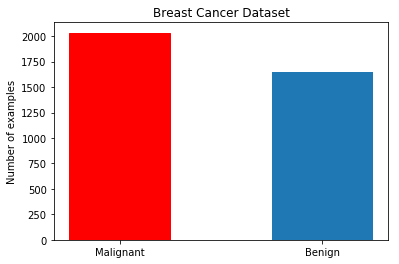

In [82]:
'''Splitting the data into training and testing i.e. 60% goes for training and 40% for testing'''
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.4)

print("Number of training examples: ",X_train.shape[0])
print("Number of testing examples: ",X_test.shape[0])

# visualize the dataset using histogram
labels = ['Malignant', 'Benign']

population = [np.sum(y==0), np.sum(y)]
y_pos = np.arange(len(labels))
barlist = plt.bar(y_pos, population, align='center',width=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Number of examples')
plt.title('Breast Cancer Dataset')
barlist[0].set_color('r')
plt.show()

###  Scaling the dataset using StandardScaler

In [83]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Applying Logistic Regression model

In [84]:
'''We have to define a threshold which will be used to predict the output of the labels
and if the probability was greater than the threshold then the label is assigned to 1 otherwise 0'''

threshold = 0.5

# Applying the model on the training data

model = LogisticRegression()

model.fit(X_train_scaled, Y_train)

predicted_labels = model.predict(X_test_scaled) > threshold


print("Error on test set using logistic regression: " ,mean_squared_error(y_true=Y_test, y_pred= predicted_labels))

Error on test set using logistic regression:  0.20420624151967434


### Getting cross validation error

In [85]:
def get_ECV(X,y,classifier,num_folds):
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    kf = KFold(n_splits=num_folds)
    kf.get_n_splits(X_scaled)
    
    
    Ens = list()
    
    for train_index, test_index in kf.split(X_scaled):
        
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = classifier
        clf.fit(x_train, y_train)
        y_predicted = clf.predict(x_test)
        accuracy_test = mean_squared_error(y_pred=y_predicted, y_true=y_test)
        Ens.append(accuracy_test)
        
    ECV = sum(Ens) / num_folds
    
    return ECV, Ens


In [86]:
cross_val_error_LR, EN = get_ECV(x, y,classifier = LogisticRegression(), num_folds=10)
print(EN)
print("Average cross validation error using logistic regression: ",cross_val_error)

[0.27100271002710025, 0.26287262872628725, 0.5636856368563685, 0.056910569105691054, 0.2682926829268293, 0.09510869565217392, 0.07880434782608696, 0.4945652173913043, 0.9619565217391305, 0.33152173913043476]
Average cross validation error using logistic regression:  0.33847207493814063


### Cross validation error using Multi-layer perceptron

In [87]:
cross_val_error_MLP, ENs = get_ECV(x,y, classifier=tree.DecisionTreeClassifier(), num_folds=10)
print(ENs)
print("Average cross validation error using Multi-layer perceptron: ", cross_val_error_MLP)

[0.2899728997289973, 0.6747967479674797, 0.4146341463414634, 0.032520325203252036, 0.34417344173441733, 0.4076086956521739, 0.07336956521739131, 0.5081521739130435, 0.842391304347826, 0.5054347826086957]
Average cross validation error using Multi-layer perceptron:  0.40930540827147405


### Getting selected attributes

In [68]:
'''Getting the 10 most important features in the dataset based on Logistic Regression '''
rfe = RFE(LogisticRegression(),10)

rfe.fit(X_train_scaled,Y_train)


selected_features = [features_vector[i] for i in range(len(features_vector)) if rfe.ranking_[i] == 1]

# Extracting the indices of the selected features which in this case has a rank of 1 in the rfe.ranking_ vector
# And then by using these indices we can get our features

print("The 10 selected features that contribute the most in the prediction using Logistic regression: ",selected_features)


The 10 selected features that contribute the most in the prediction using Logistic regression:  [' x', ' rmean', ' rstd', ' b1mean', ' surfovervol', 'Sum Average', 'SRE', 'RP', 'HGRE', 'Complexity']
